In [54]:
a = [[1,2], [2,1]]
b = [[4,1], [2,2]]
np.dot(a,b)

array([[ 8,  5],
       [10,  4]])

* IBM sample datasets
https://www.kaggle.com/blastchar/telco-customer-churn

* Demographic info: 
    * Gender, SeniorCitizen, Partner, Dependents
* Services subscribed: 
    * PhoneService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
* Customer account info:
    * CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

## load dataset

In [3]:
df = pd.read_csv("data/telco.csv")
df.shape

(7043, 21)

In [4]:
pd.options.display.max_columns = 22

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### describe

In [10]:
# describe 로 미리보기 합니다.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# describe 로 object 데이터를 미리보기 합니다.
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,6591-QGOYB,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### 수치형 데이터 시각화

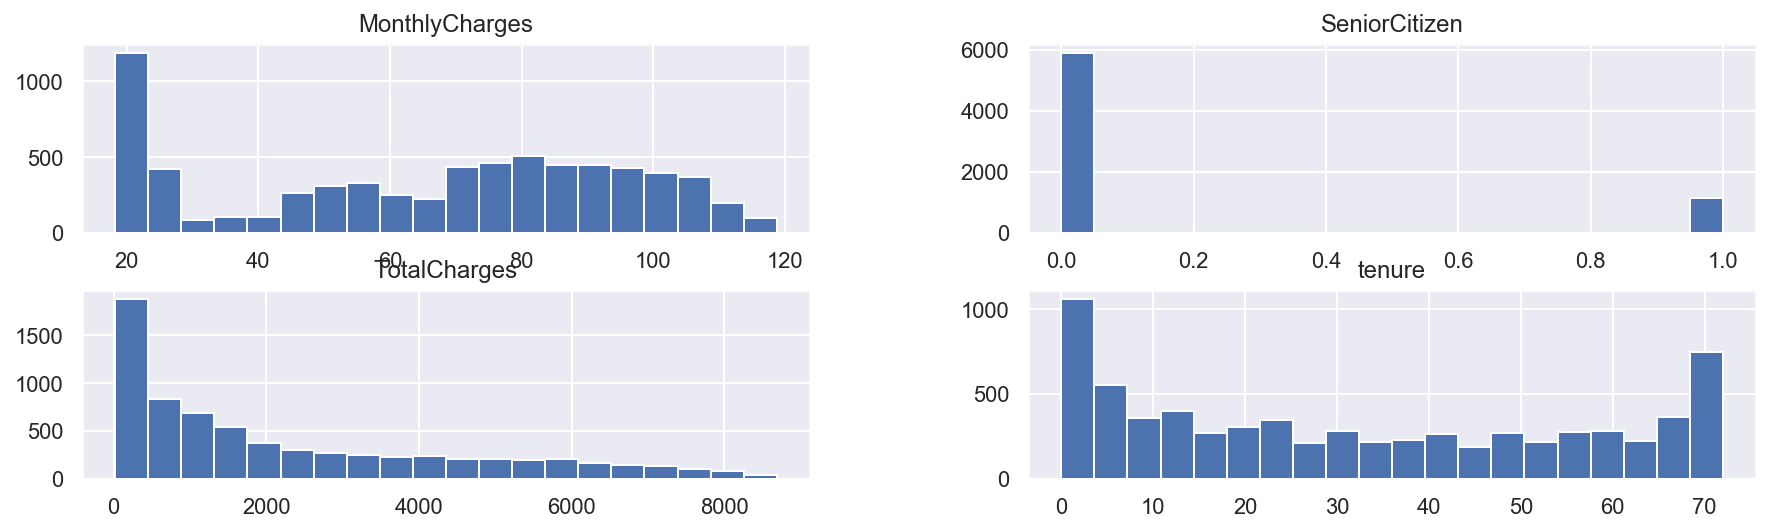

In [12]:
# pandas 의 hist 를 통해 수치 데이터의 히스토그램을 그립니다.
h = df.hist(bins=20, figsize=(15, 4))

In [13]:
df.shape

(7043, 21)

In [14]:
df_numeric = df.select_dtypes(exclude="object").copy()
df_numeric

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [17]:
# 수치형 데이터만 가져와서 시각화를 할 수 있도록 na 값을 제거하고 df_numeric 이라는 변수에 담습니다.
df_numeric["Churn"] = df["Churn"]
df_numeric = df_numeric.dropna()
df_numeric.shape

(7032, 5)

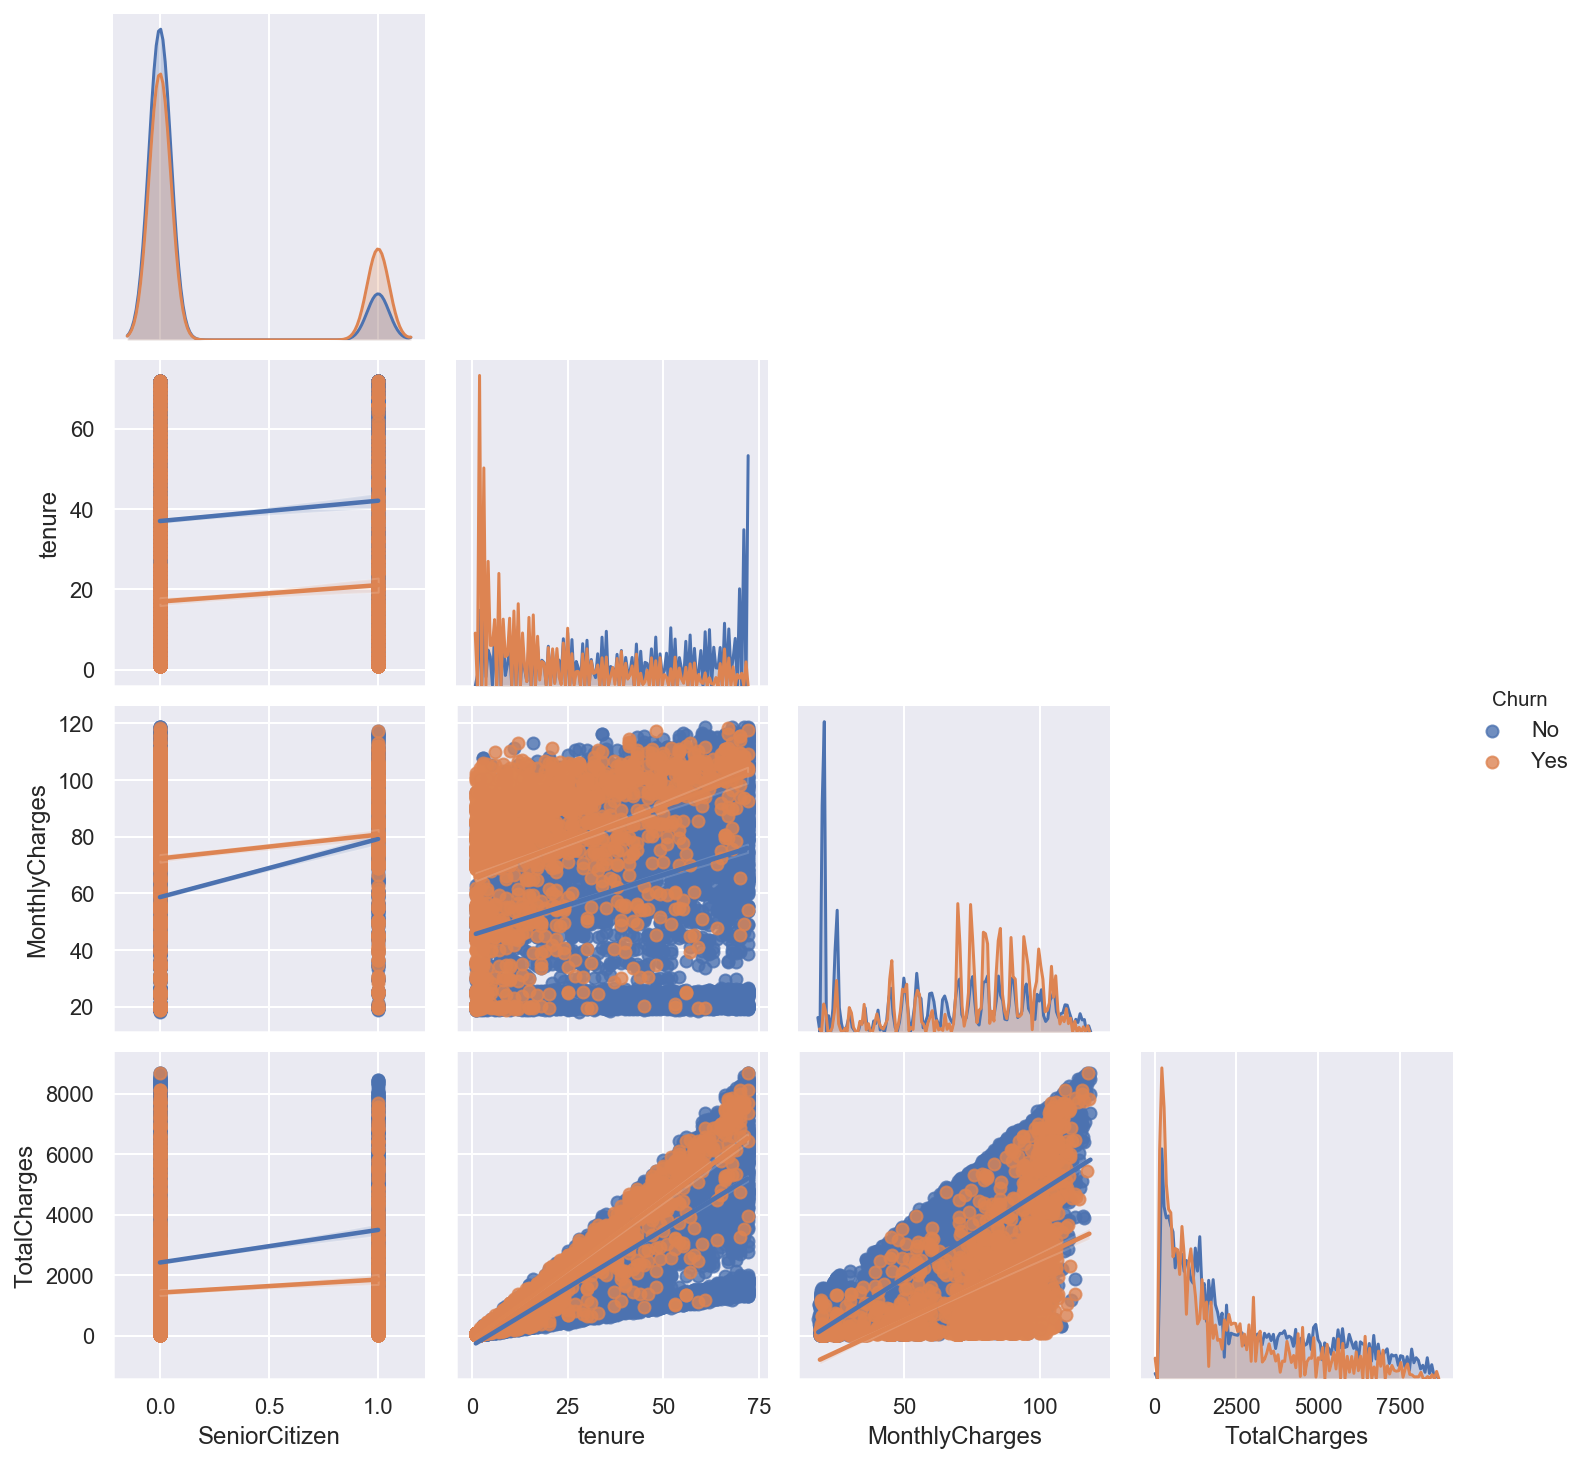

In [19]:
# pairplot 을 그립니다.
# bw에 대해 경고 메시지가 뜬다면 다음 옵션을 사용합니다. diag_kws={"bw":.05},
sns.pairplot(df_numeric, hue="Churn", kind='reg', diag_kws={"bw":.05}, corner=True)

### 범주형 데이터 시각화

In [20]:
nunique = df.nunique()
nunique

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [21]:
# 이렇게 따로 만든이유는 나중에 원핫인코딩 하기위해서 
category_col = nunique[nunique < 10]
category_col

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [22]:
bi_category = nunique[nunique < 3]
bi_cols = bi_category.index.tolist()
bi_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

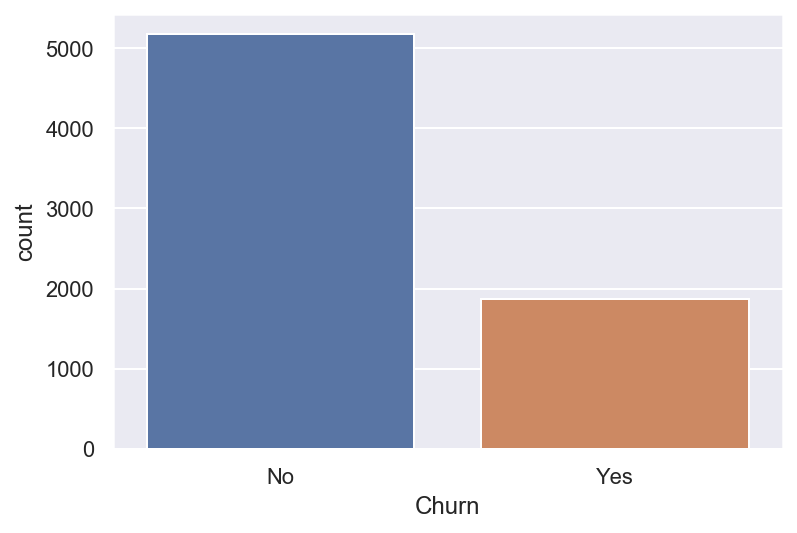

In [23]:
sns.countplot(data=df, x="Churn")

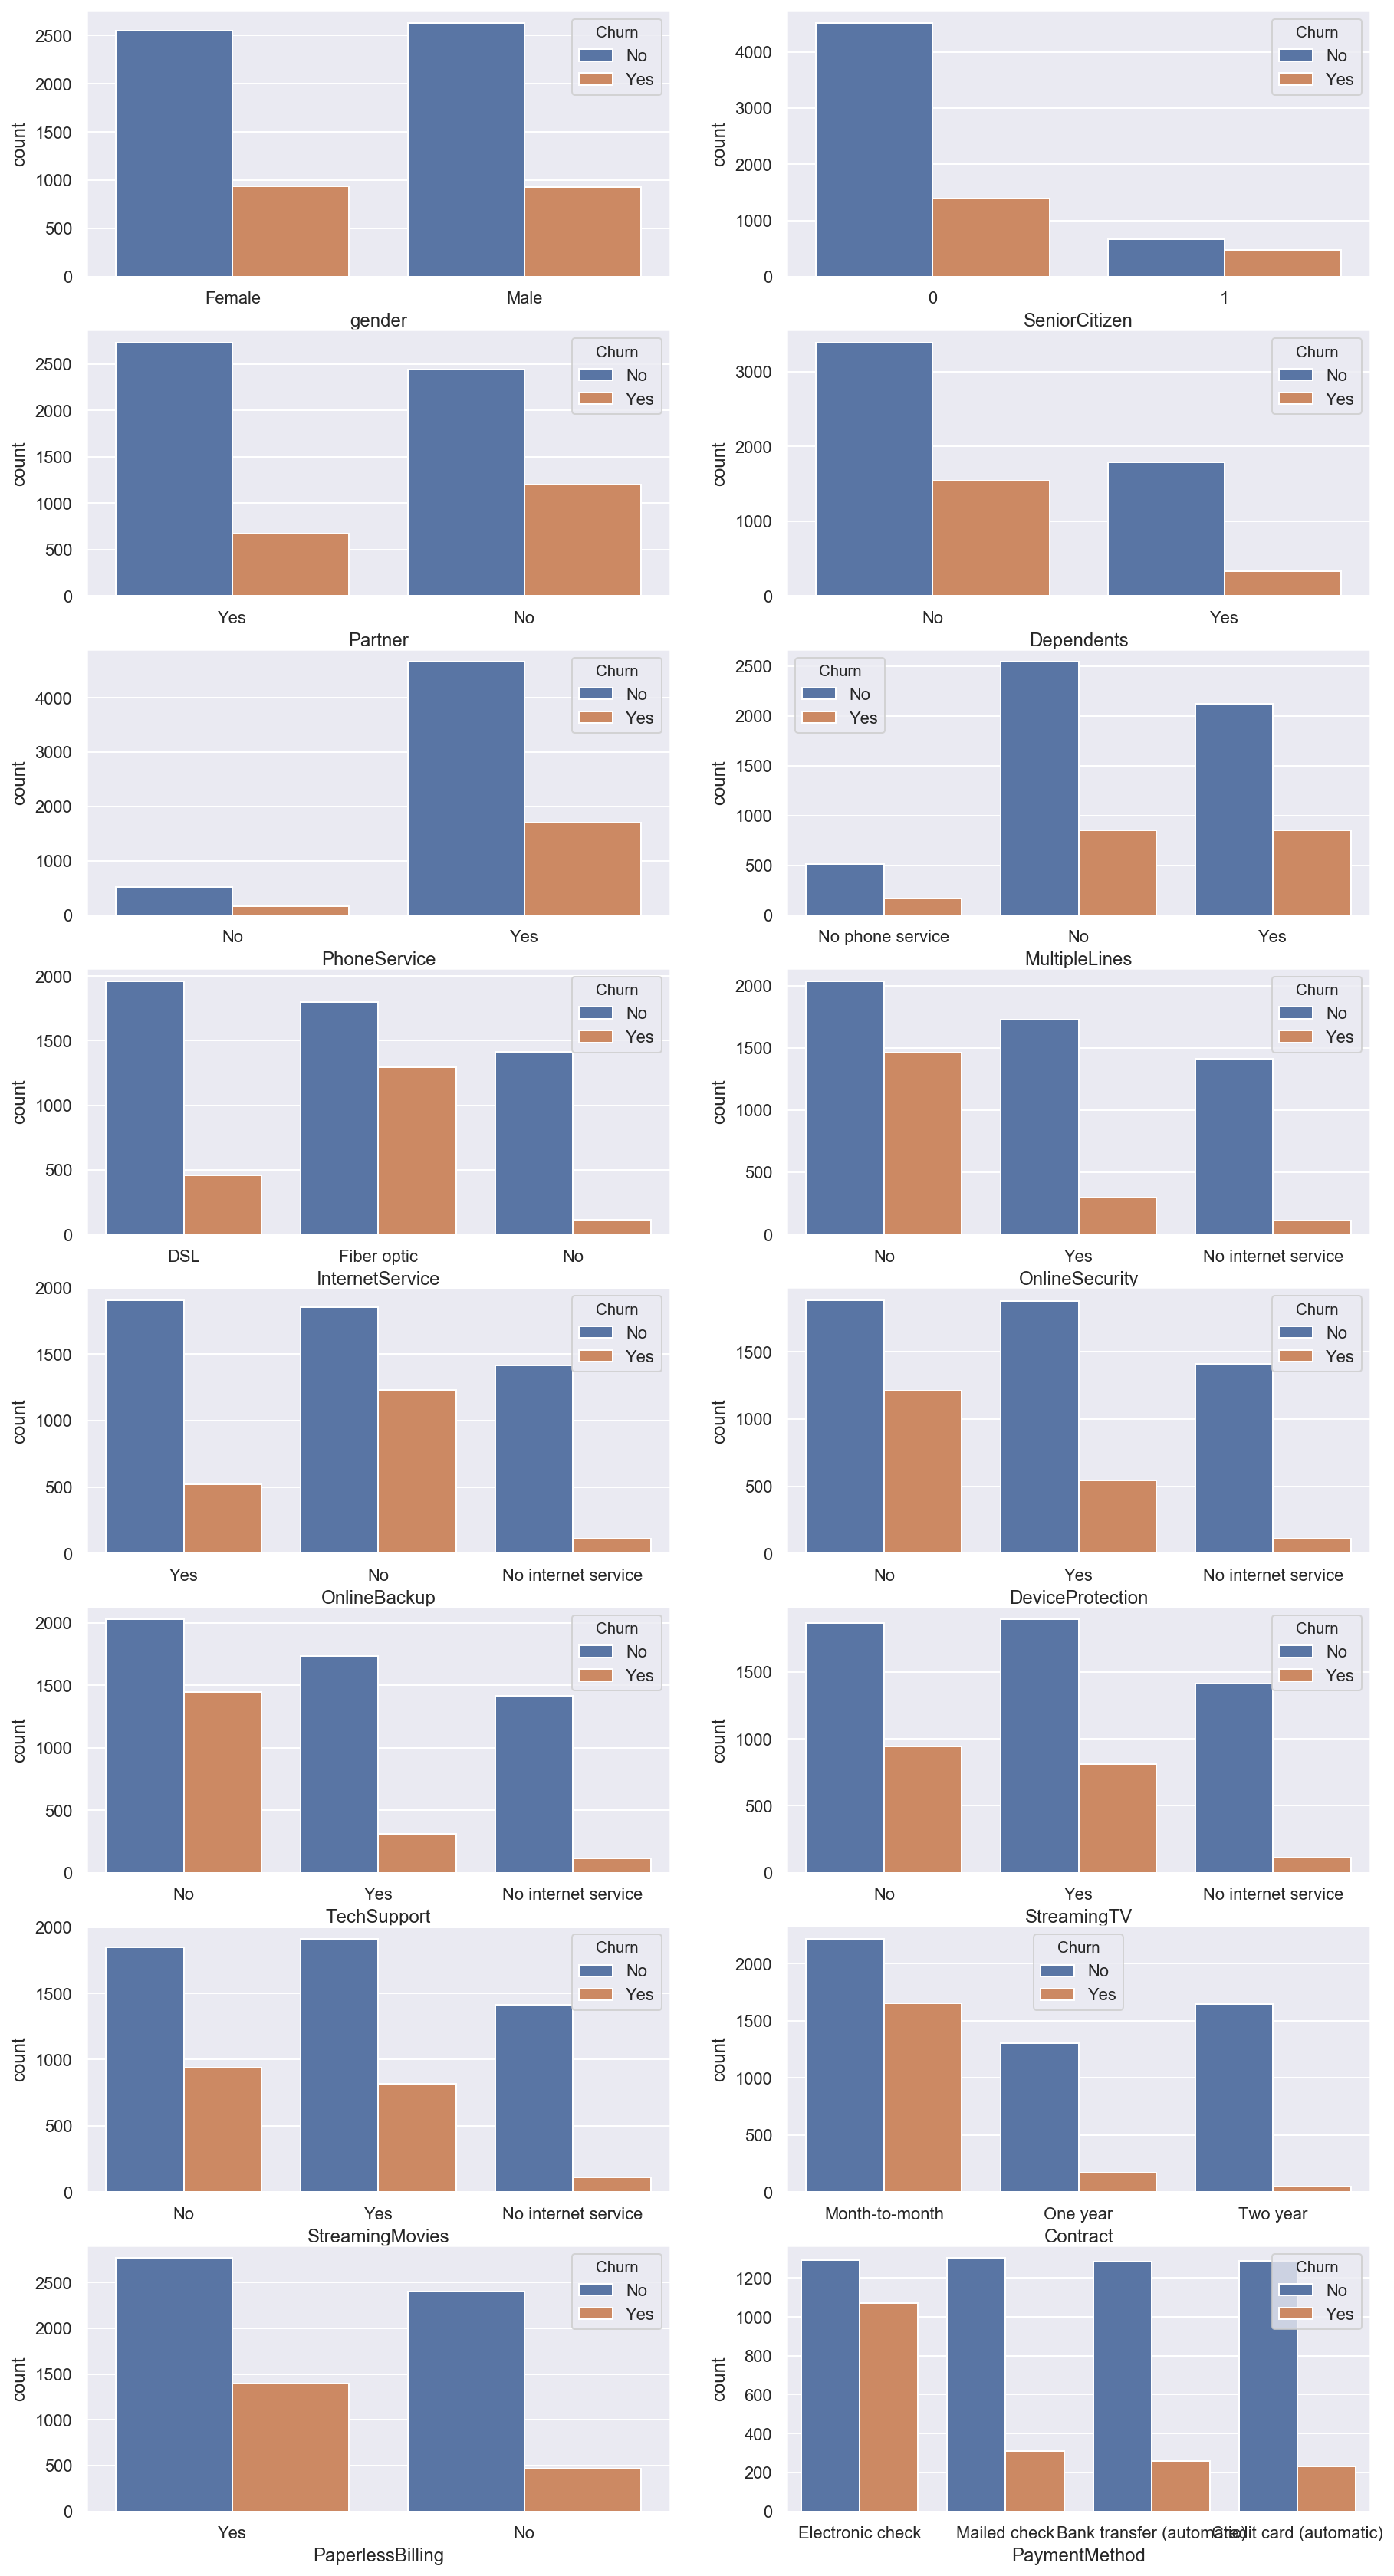

In [63]:
category_col_name = category_col.index.tolist()
col_len = len(category_col_name)

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 30))
for i, cat_col in enumerate(category_col_name[:-1]):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=cat_col, hue="Churn", ax=axes[row, col])

In [27]:
df[bi_cols].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Female,0,Yes,No,No,Yes,No
1,Male,0,No,No,Yes,No,No
2,Male,0,No,No,Yes,Yes,Yes
3,Male,0,No,No,No,No,No
4,Female,0,No,No,Yes,Yes,Yes


### 바이너리 변수에 대한 인코딩

In [39]:
# gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn

df['gender_bool'] = (df['gender'] =='Male')
df['Partner_bool'] = (df['Partner'] == 'Yes')
df['Dependents_bool'] = (df['Dependents'] == 'Yes')
df['PhoneService_bool'] = (df['PhoneService'] == 'Yes')
df['PaperlessBilling_bool'] = (df['PaperlessBilling'] == 'Yes')
df['Churn_bool'] = (df['Churn'] =='Yes')

In [42]:
df[['gender_bool', 'Partner_bool']].head()

,gender_bool,Partner_bool
0,False,True
1,True,False
2,True,False
3,True,False
4,False,False


In [44]:
corr = df.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_bool,Partner_bool,Dependents_bool,PhoneService_bool,PaperlessBilling_bool,Churn_bool
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,-0.001874,0.016479,-0.211185,0.008576,0.156530,0.150889
tenure,0.016567,1.000000,0.247900,0.825880,0.005106,0.379697,0.159712,0.008448,0.006152,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,-0.014569,0.096848,-0.113890,0.247398,0.352150,0.193356
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.000048,0.319072,0.064653,0.113008,0.157830,-0.199484
gender_bool,-0.001874,0.005106,-0.014569,0.000048,1.000000,-0.001808,0.010517,-0.006488,-0.011754,-0.008612
Partner_bool,0.016479,0.379697,0.096848,0.319072,-0.001808,1.000000,0.452676,0.017706,-0.014877,-0.150448
Dependents_bool,-0.211185,0.159712,-0.113890,0.064653,0.010517,0.452676,1.000000,-0.001762,-0.111377,-0.164221
PhoneService_bool,0.008576,0.008448,0.247398,0.113008,-0.006488,0.017706,-0.001762,1.000000,0.016505,0.011942
PaperlessBilling_bool,0.156530,0.006152,0.352150,0.157830,-0.011754,-0.014877,-0.111377,0.016505,1.000000,0.191825
Churn_bool,0.150889,-0.352229,0.193356,-0.199484,-0.008612,-0.150448,-0.164221,0.011942,0.191825,1.000000


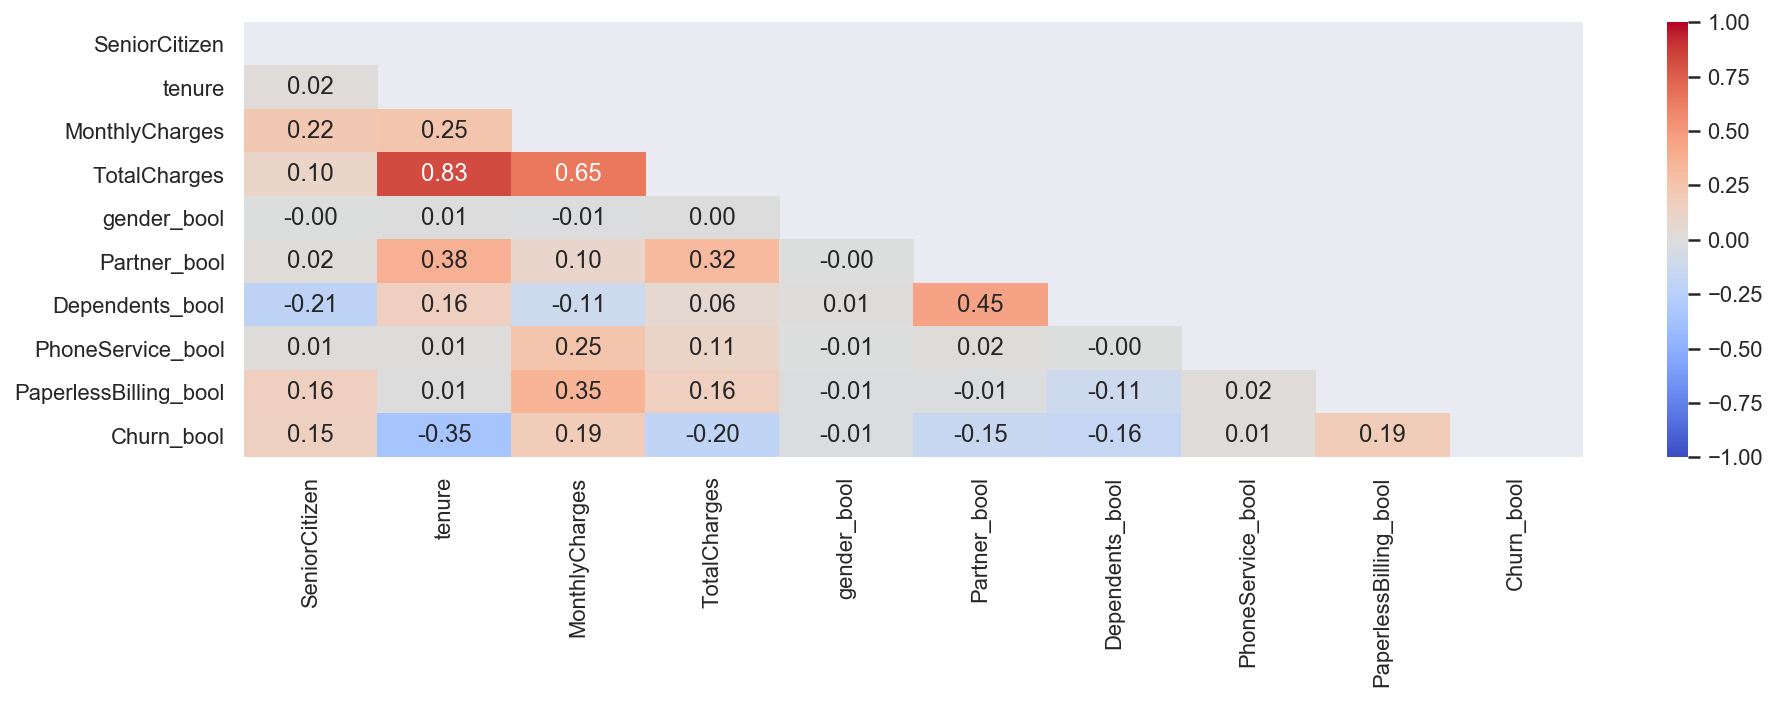

In [62]:
# 수치변수에 대한 상관계수 구해서 그리기
# corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(15, 4))
sns.heatmap(corr, annot = True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

### 수치형 변수

In [55]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [56]:
cat_cols = nunique[( nunique > 2 ) & ( nunique < 10 )]
cat_cols = cat_cols.index.tolist()
cat_cols

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [57]:
df["Churn"]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [58]:
df.groupby("Churn")[bi_cols].mean()

,SeniorCitizen
Churn,
No,0.128721
Yes,0.254682


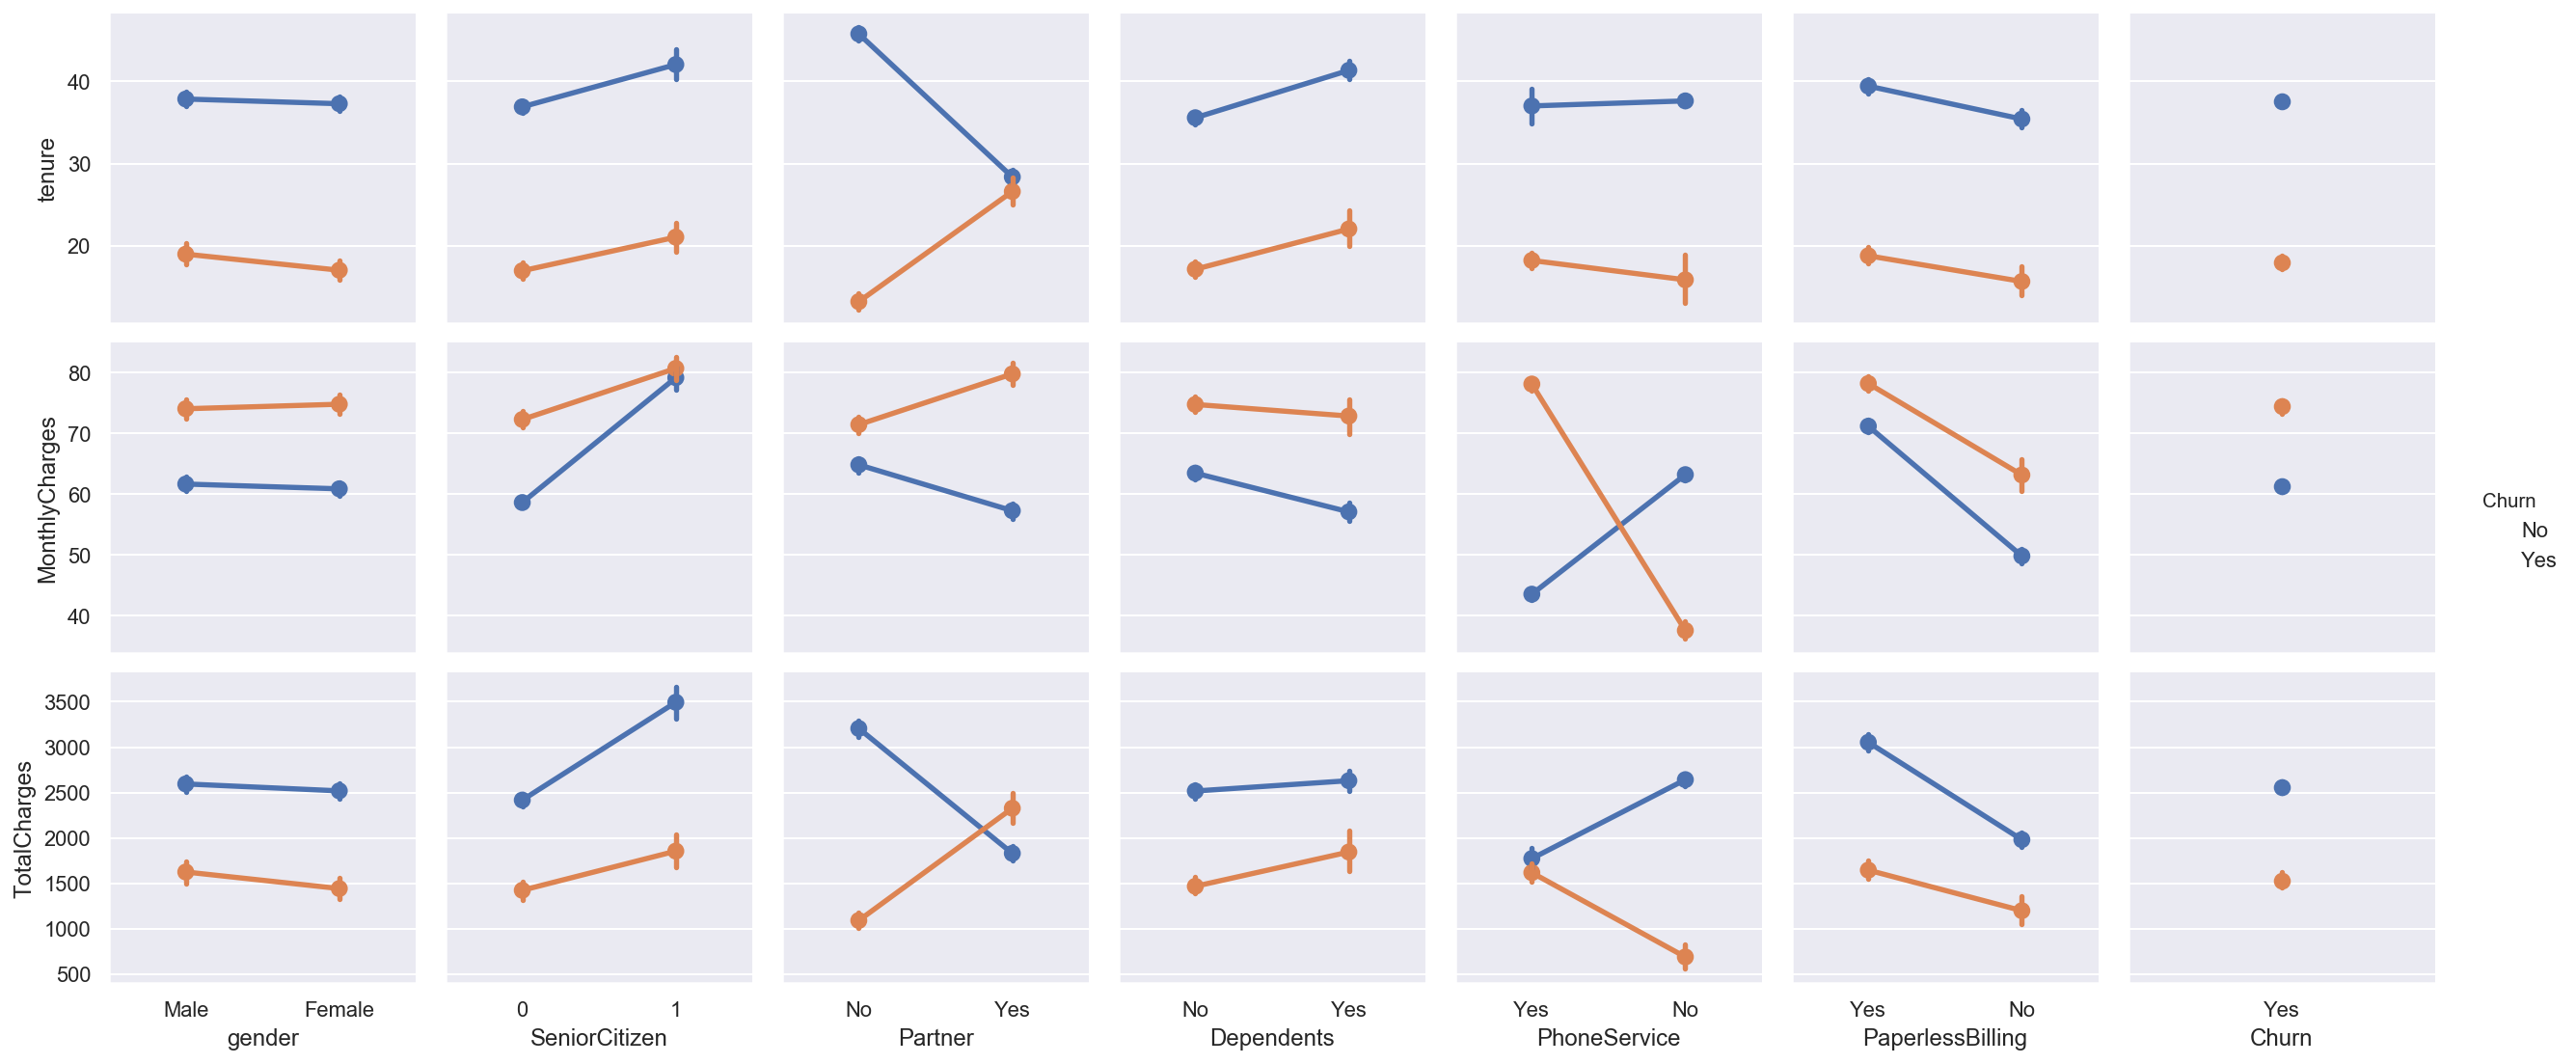

In [59]:
# x축에 범주형 y축 수치형(평균을 구해서 하나의 점씩 찍힘) 
g = sns.PairGrid(data=df, x_vars=bi_cols, y_vars=num_cols, hue="Churn")
g.map(sns.pointplot)
g.add_legend()

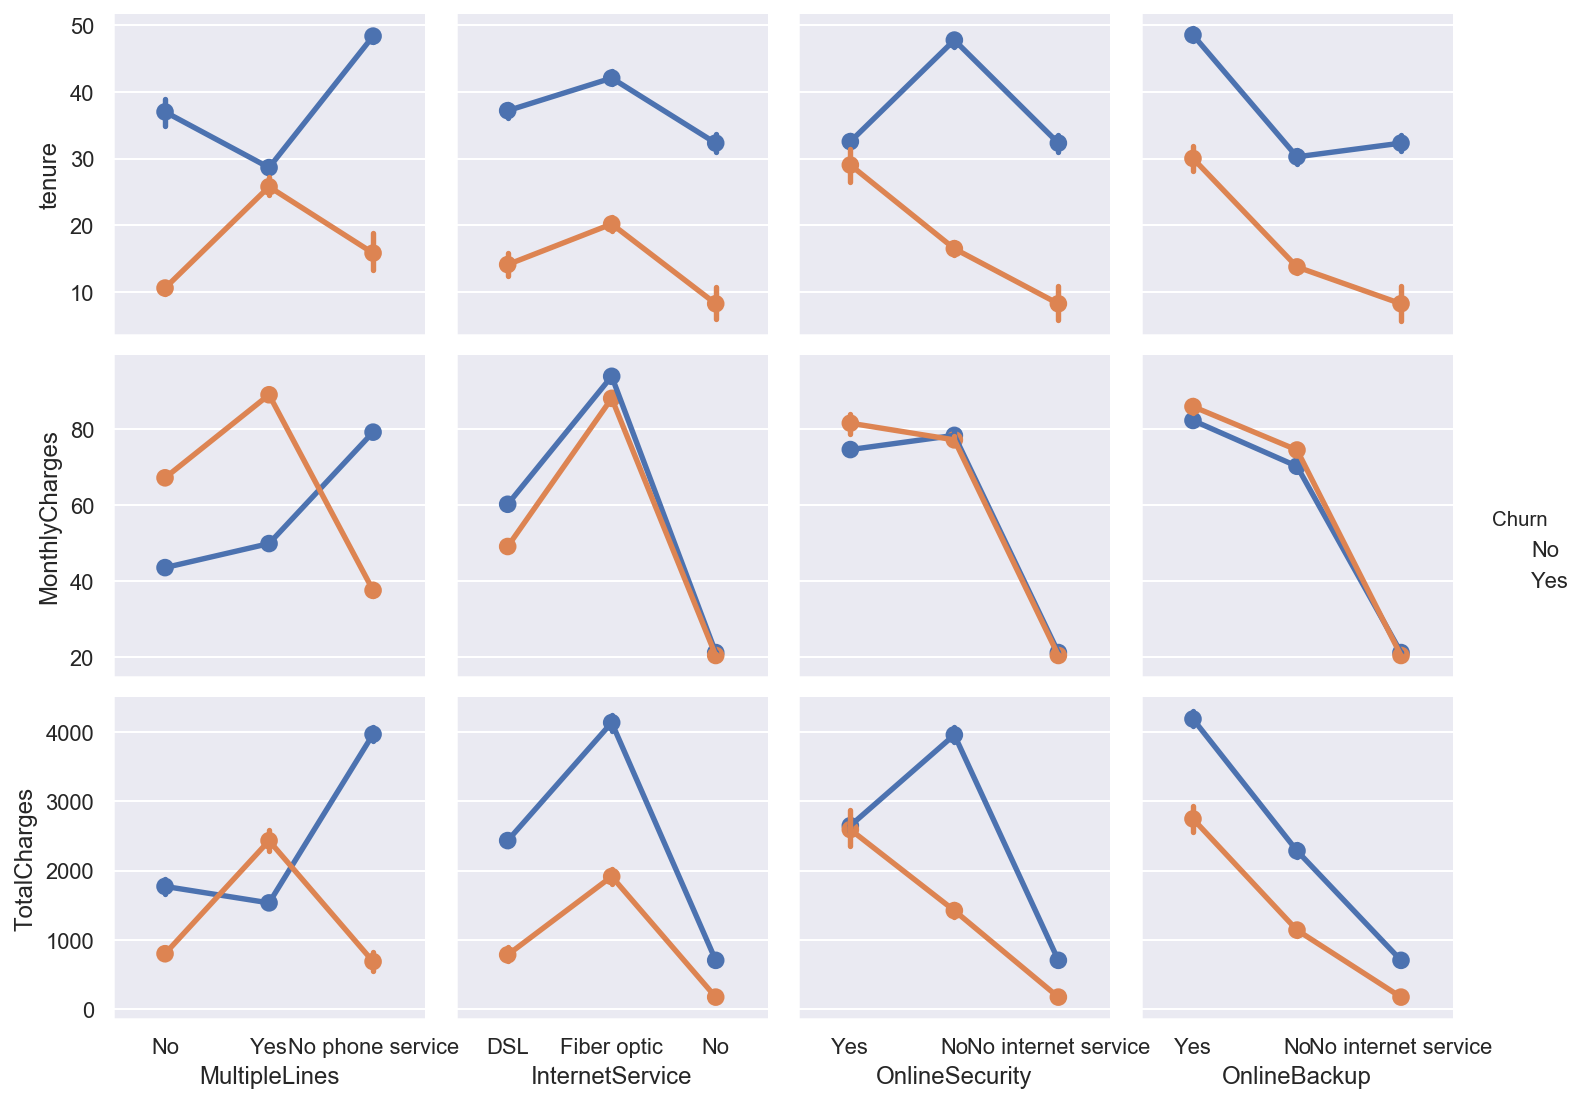

In [65]:
g = sns.PairGrid(data=df, x_vars=cat_cols[:4], y_vars=num_cols, hue="Churn")
g.map(sns.pointplot)
g.add_legend()

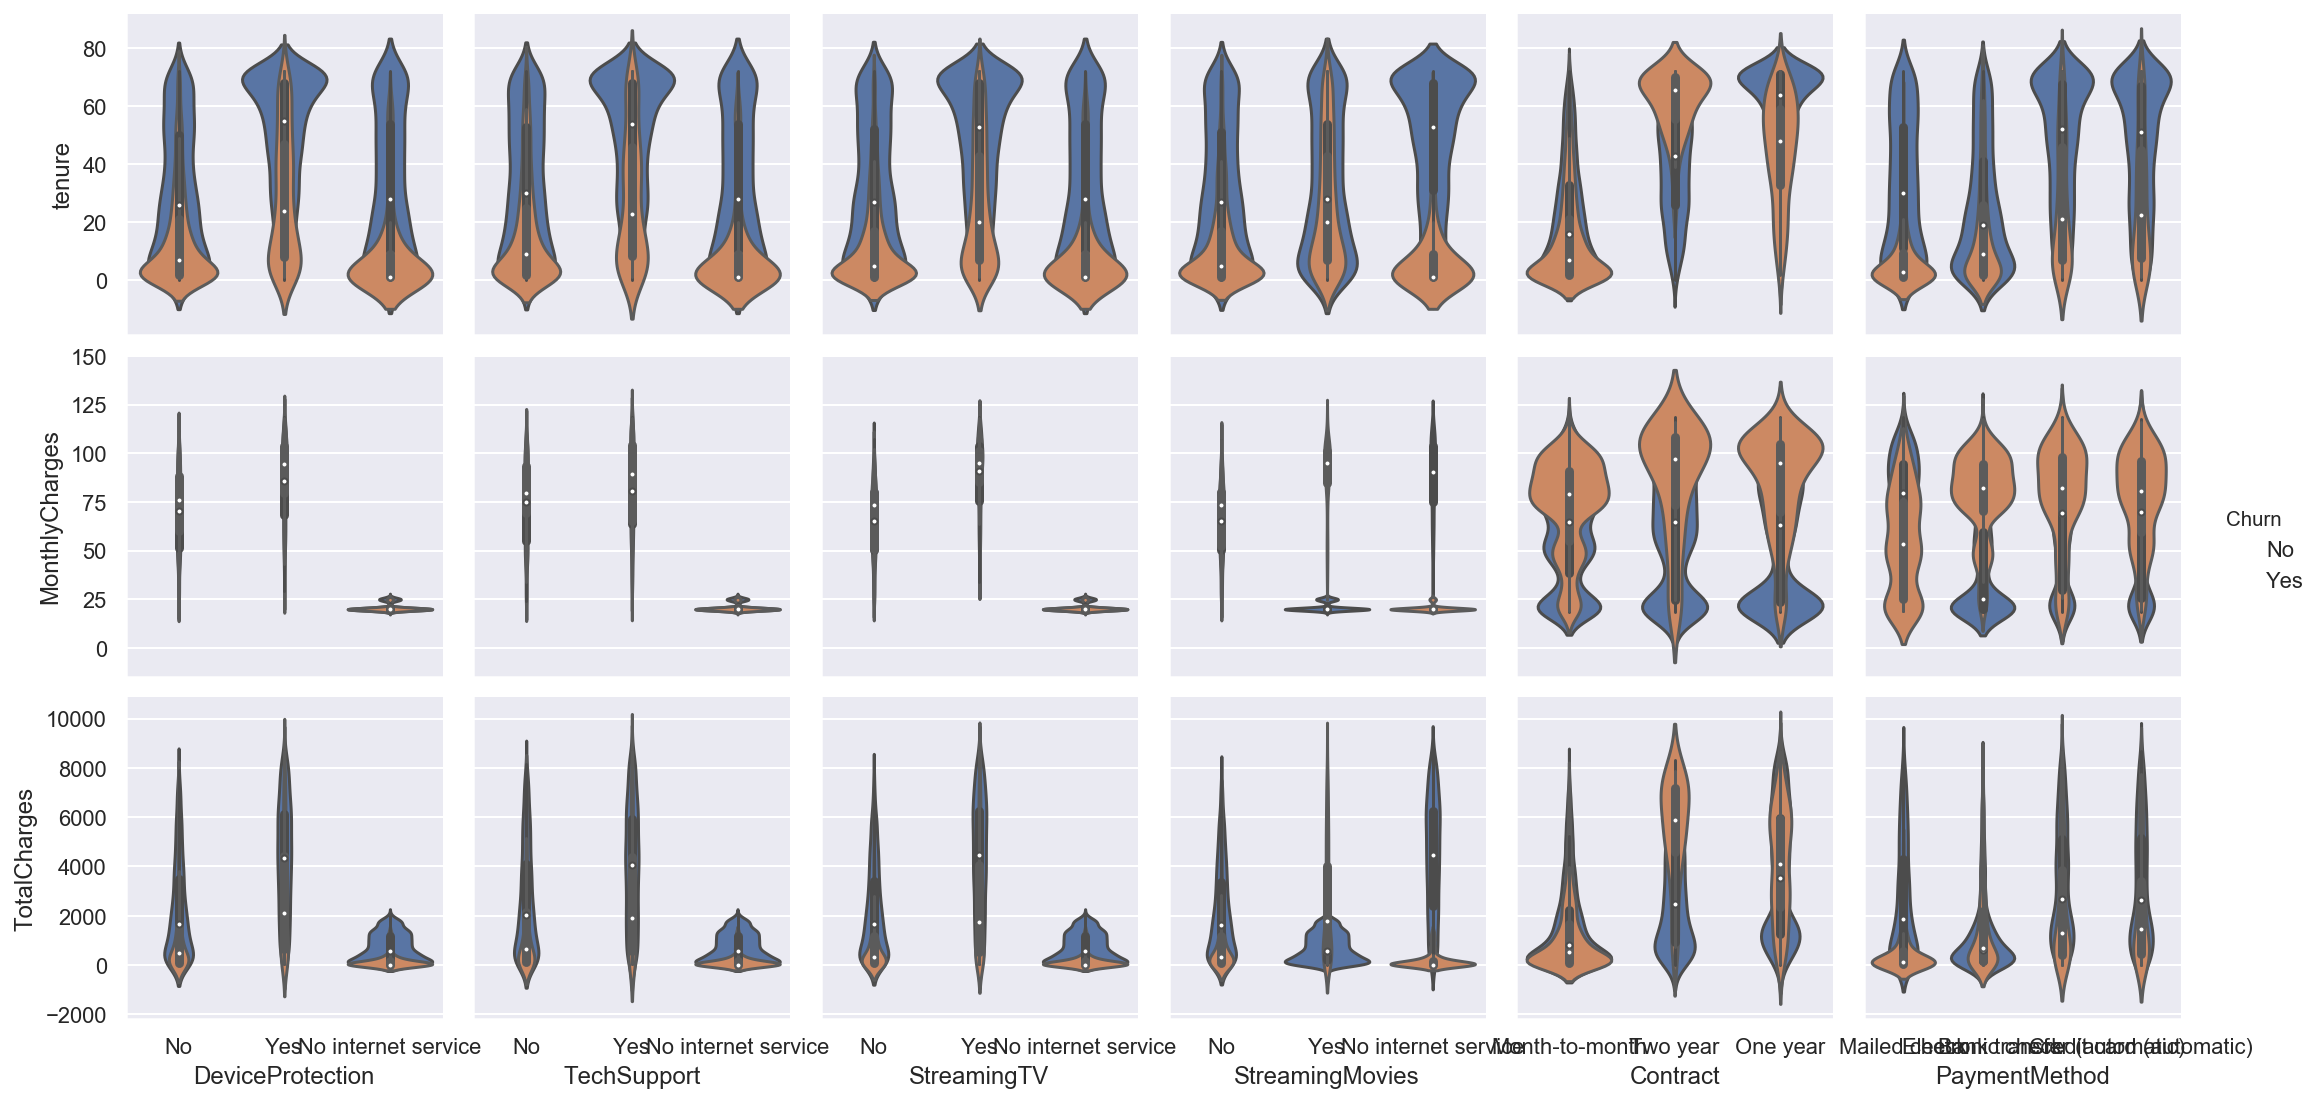

In [66]:
g = sns.PairGrid(data=df, x_vars=cat_cols[4:], y_vars=num_cols, hue="Churn")
g.map(sns.violinplot)
g.add_legend()

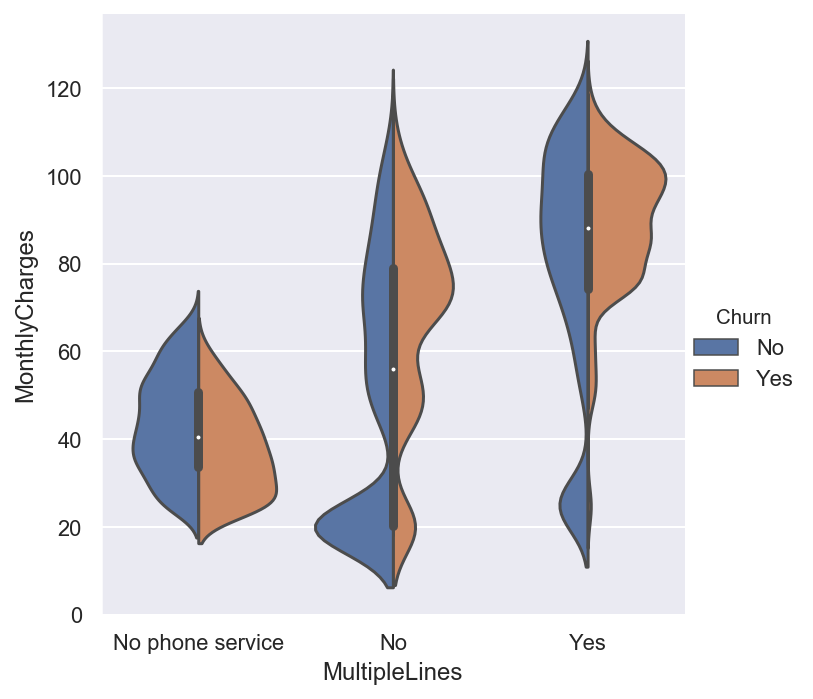

In [67]:
sns.catplot(data=df, x="MultipleLines", y="MonthlyCharges", hue="Churn", 
            kind="violin", split=True)

### binning

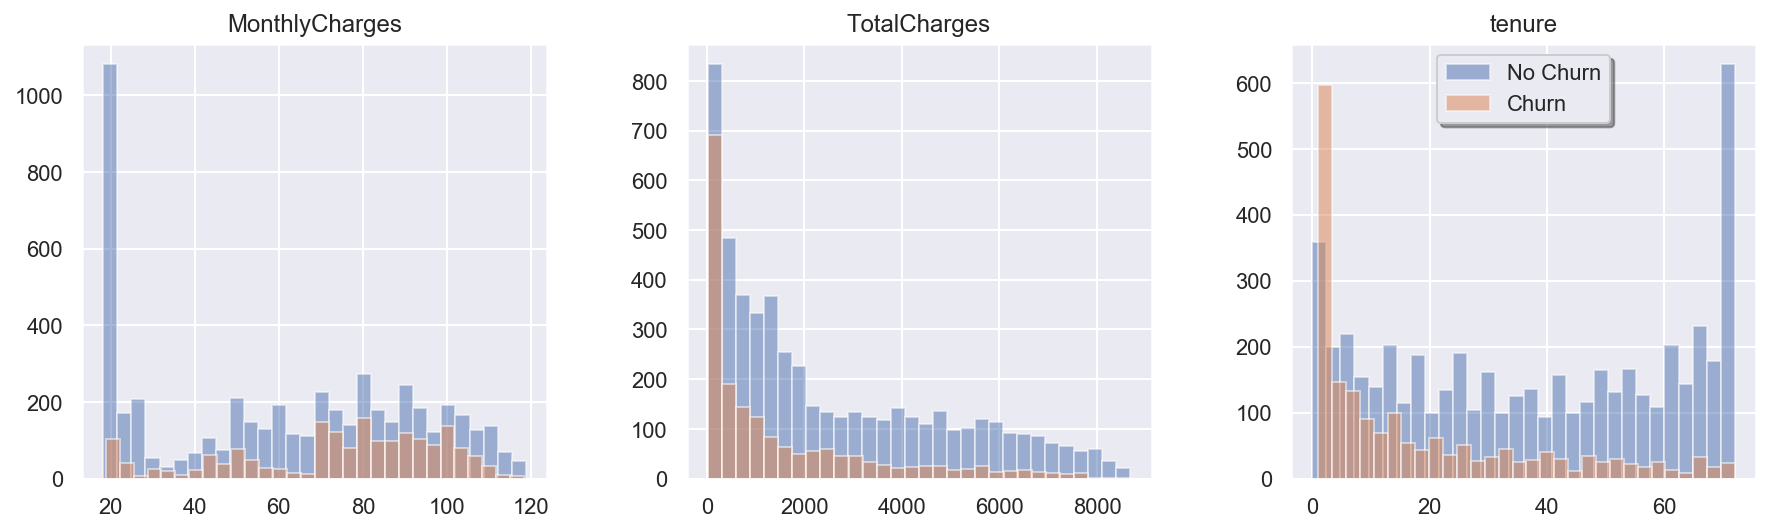

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
df.loc[df["Churn_bool"] == False, num_cols].hist(bins=30, alpha=.5, ax=axes)
df.loc[df["Churn_bool"] == True, num_cols].hist(bins=30, alpha=.5, ax=axes)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

In [69]:
## MonthlyCharges 를 qcut을 통해 나눕니다. 범위를 디테일하게 지정할수없다
pd.qcut(df["MonthlyCharges"], q=4, labels=["<35", "<70", "<89", "<119"])

0        <35
1        <70
2        <70
3        <70
4        <89
        ... 
7038     <89
7039    <119
7040     <35
7041     <89
7042    <119
Name: MonthlyCharges, Length: 7043, dtype: category
Categories (4, object): [<35 < <70 < <89 < <119]

In [71]:
# monthlycharges_split 을 30, 70, 100  범위로 나눕니다.
def monthlycharges_split(df) :   
    if df['MonthlyCharges'] <= 30 :
        return '0-30'
    elif (df['MonthlyCharges'] > 30) & (df['MonthlyCharges'] <= 70 ):
        return '30-70'
    elif (df['MonthlyCharges'] > 70) & (df['MonthlyCharges'] <= 99 ):
        return '70-99'
    elif df['MonthlyCharges'] > 99 :
        return '99plus'
    
df['monthlycharges_group'] = df.apply(monthlycharges_split, axis = 1)
df[['MonthlyCharges', 'monthlycharges_group']].head()

,MonthlyCharges,monthlycharges_group
0,29.85,0-30
1,56.95,30-70
2,53.85,30-70
3,42.30,30-70
4,70.70,70-99


In [73]:
# TotalCharges 를 2000, 4000, 6000 으로 나눕니다.
# 아래의 함수를 해당 구간에 따라 나누도록 완성합니다.
def totalcharges_split(df) :   
    if df['TotalCharges'] <= 2000 :
        return '0-2k'
    elif df['TotalCharges'] > 2000 and df['TotalCharges'] <=4000 :
        return '2k-4k'
    elif df['TotalCharges'] < 4000 and df['TotalCharges'] <=6000 :
        return '4k-6k'
    else :
        return '6kplus'

df['totalcharges_group'] = df.apply(totalcharges_split, axis = 1)
df[['TotalCharges', 'totalcharges_group']].sample(10)

,TotalCharges,totalcharges_group
144,1756.20,0-2k
317,3058.65,2k-4k
6533,2998.00,2k-4k
3793,186.15,0-2k
62,2962.00,2k-4k
4878,1882.80,0-2k
3102,308.25,0-2k
4822,7559.55,6kplus
4995,552.95,0-2k
566,1667.25,0-2k


In [74]:
# tenure 를 20, 40, 60 으로 나눕니다.
def tenure_split(df) : 
    if df['tenure'] <= 20:
        return '0-20'
    elif df['tenure'] > 20 and df['tenure'] <= 40 :
        return '20-40'
    elif df['tenure'] > 40 and df['tenure'] <= 60 :
        return '40-60'
    else :
        return '60plus'
    
    
df['tenure_group'] = df.apply(tenure_split, axis = 1)
df[['tenure', 'tenure_group']].sample(10)

,tenure,tenure_group
271,57,40-60
138,57,40-60
1798,35,20-40
2950,4,0-20
2025,72,60plus
5778,1,0-20
2481,61,60plus
1427,44,40-60
6205,42,40-60
760,1,0-20


### One Hot Encoding
* 범주형 데이터 => 수치형 데이터로 변환

In [75]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [76]:
bi_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [77]:
cols = df.columns.tolist()
cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'gender_bool',
 'Partner_bool',
 'Dependents_bool',
 'PhoneService_bool',
 'PaperlessBilling_bool',
 'Churn_bool',
 'monthlycharges_group',
 'totalcharges_group',
 'tenure_group']

In [80]:
bi_bool_cols = []

for col in bi_cols:
    bi_bool_cols.append(f"{col}_bool")
    print(f"{col}_bool")
    
bi_bool_cols

gender_bool
SeniorCitizen_bool
Partner_bool
Dependents_bool
PhoneService_bool
PaperlessBilling_bool
Churn_bool


['gender_bool',
 'SeniorCitizen_bool',
 'Partner_bool',
 'Dependents_bool',
 'PhoneService_bool',
 'PaperlessBilling_bool',
 'Churn_bool']

In [81]:
multi_cols = set(cols) - set(bi_cols) - set(num_cols) - set(bi_bool_cols)
multi_cols = list(multi_cols)
multi_cols.remove("customerID") # 리스트에서 제거 remove
multi_cols

['MultipleLines',
 'tenure_group',
 'StreamingMovies',
 'OnlineSecurity',
 'DeviceProtection',
 'StreamingTV',
 'totalcharges_group',
 'Contract',
 'OnlineBackup',
 'InternetService',
 'PaymentMethod',
 'monthlycharges_group',
 'TechSupport']

In [82]:
df[multi_cols].head()

,MultipleLines,tenure_group,StreamingMovies,OnlineSecurity,DeviceProtection,StreamingTV,totalcharges_group,Contract,OnlineBackup,InternetService,PaymentMethod,monthlycharges_group,TechSupport
0,No phone service,0-20,No,No,No,No,0-2k,Month-to-month,Yes,DSL,Electronic check,0-30,No
1,No,20-40,No,Yes,Yes,No,0-2k,One year,No,DSL,Mailed check,30-70,No
2,No,0-20,No,Yes,No,No,0-2k,Month-to-month,Yes,DSL,Mailed check,30-70,No
3,No phone service,40-60,No,Yes,Yes,No,0-2k,One year,No,DSL,Bank transfer (automatic),30-70,Yes
4,No,0-20,No,No,No,No,0-2k,Month-to-month,No,Fiber optic,Electronic check,70-99,No


In [83]:
pd.options.display.max_columns = 55

In [90]:
d_cols = set(cols) - set(bi_cols) - set(num_cols)
d_cols = list(d_cols)
df_d = df[d_cols]

In [91]:
# 바이너리 데이터를 제외한 범주형 컬럼을 인코딩
df_feature = pd.get_dummies(data = df_d, columns = multi_cols)
df_feature

,gender_bool,PhoneService_bool,Dependents_bool,customerID,PaperlessBilling_bool,Churn_bool,Partner_bool,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_6kplus,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,False,False,False,7590-VHVEG,True,False,True,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0
1,True,True,False,5575-GNVDE,False,False,False,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
2,True,True,False,3668-QPYBK,True,True,False,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,True,False,False,7795-CFOCW,False,False,False,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
4,False,True,False,9237-HQITU,True,True,False,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,True,True,6840-RESVB,True,False,True,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
7039,False,True,True,2234-XADUH,True,False,True,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0
7040,False,False,True,4801-JZAZL,True,False,True,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0
7041,True,True,False,8361-LTMKD,True,True,True,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0


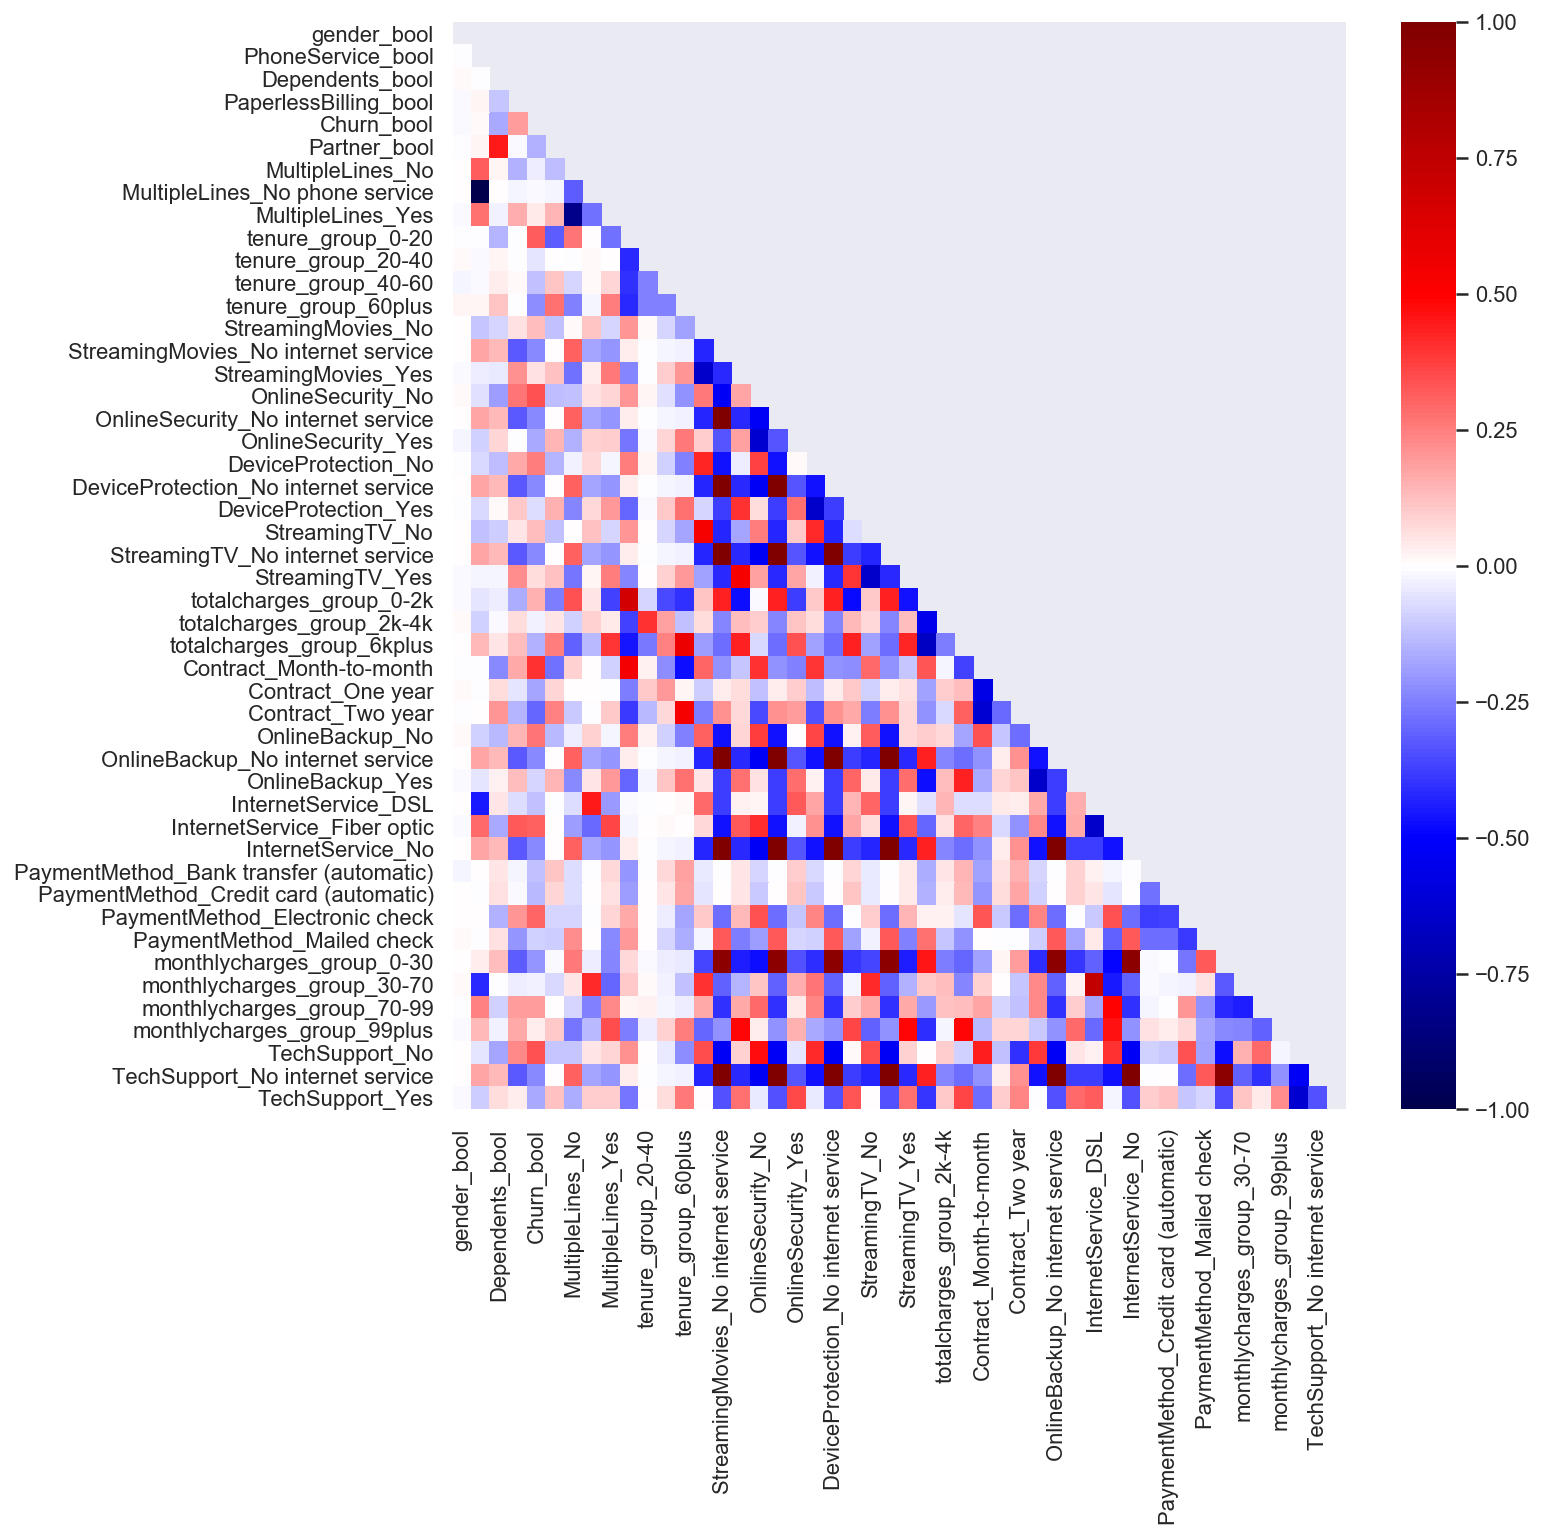

In [93]:
corr = df_feature.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="seismic", vmin=-1, vmax=1, mask=mask)

In [99]:
feature_cols = df_feature.columns.tolist()
#for ncol in num_cols:
#    feature_cols.remove(ncol)

#feature_cols
feature_cols.sort()
feature_cols

['Churn_bool',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'Dependents_bool',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'PaperlessBilling_bool',
 'Partner_bool',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'PhoneService_bool',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'customerID',
 'gender_bool',

In [100]:
df_feature = df_feature[feature_cols]
df_feature.head()

,Churn_bool,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_bool,Partner_bool,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_bool,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,customerID,gender_bool,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_6kplus
0,False,1,0,0,False,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,True,True,0,0,1,0,False,1,0,0,1,0,0,1,0,0,7590-VHVEG,False,1,0,0,0,1,0,0,0,1,0,0
1,False,0,1,0,False,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,False,False,0,0,0,1,True,1,0,0,1,0,0,1,0,0,5575-GNVDE,True,0,1,0,0,0,1,0,0,1,0,0
2,True,1,0,0,False,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,True,False,0,0,0,1,True,1,0,0,1,0,0,1,0,0,3668-QPYBK,True,0,1,0,0,1,0,0,0,1,0,0
3,False,0,1,0,False,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,False,False,1,0,0,0,False,1,0,0,1,0,0,0,0,1,7795-CFOCW,True,0,1,0,0,0,0,1,0,1,0,0
4,True,1,0,0,False,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,True,False,0,0,1,0,True,1,0,0,1,0,0,1,0,0,9237-HQITU,False,0,0,1,0,1,0,0,0,1,0,0


In [101]:
# csv 파일로 저장합니다.
df_feature.to_csv("data/telco_feature.csv", index=False)

In [102]:
# 제대로 저장되었는지 확인합니다.
pd.read_csv("data/telco_feature.csv")

,Churn_bool,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_bool,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,PaperlessBilling_bool,Partner_bool,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_bool,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,customerID,gender_bool,monthlycharges_group_0-30,monthlycharges_group_30-70,monthlycharges_group_70-99,monthlycharges_group_99plus,tenure_group_0-20,tenure_group_20-40,tenure_group_40-60,tenure_group_60plus,totalcharges_group_0-2k,totalcharges_group_2k-4k,totalcharges_group_6kplus
0,False,1,0,0,False,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,True,True,0,0,1,0,False,1,0,0,1,0,0,1,0,0,7590-VHVEG,False,1,0,0,0,1,0,0,0,1,0,0
1,False,0,1,0,False,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,False,False,0,0,0,1,True,1,0,0,1,0,0,1,0,0,5575-GNVDE,True,0,1,0,0,0,1,0,0,1,0,0
2,True,1,0,0,False,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,True,False,0,0,0,1,True,1,0,0,1,0,0,1,0,0,3668-QPYBK,True,0,1,0,0,1,0,0,0,1,0,0
3,False,0,1,0,False,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,False,False,1,0,0,0,False,1,0,0,1,0,0,0,0,1,7795-CFOCW,True,0,1,0,0,0,0,1,0,1,0,0
4,True,1,0,0,False,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,True,False,0,0,1,0,True,1,0,0,1,0,0,1,0,0,9237-HQITU,False,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,0,1,0,True,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,True,True,0,0,0,1,True,0,0,1,0,0,1,0,0,1,6840-RESVB,True,0,0,1,0,0,1,0,0,1,0,0
7039,False,0,1,0,True,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,True,True,0,1,0,0,True,0,0,1,0,0,1,1,0,0,2234-XADUH,False,0,0,0,1,0,0,0,1,0,0,1
7040,False,1,0,0,True,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,True,True,0,0,1,0,False,1,0,0,1,0,0,1,0,0,4801-JZAZL,False,1,0,0,0,1,0,0,0,1,0,0
7041,True,1,0,0,False,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,True,True,0,0,0,1,True,1,0,0,1,0,0,1,0,0,8361-LTMKD,True,0,0,1,0,1,0,0,0,1,0,0
